In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import MCMT
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
n=7
q=0

cnz = MCMT('z', n-1, 1)
# cnz.draw(output='mpl')

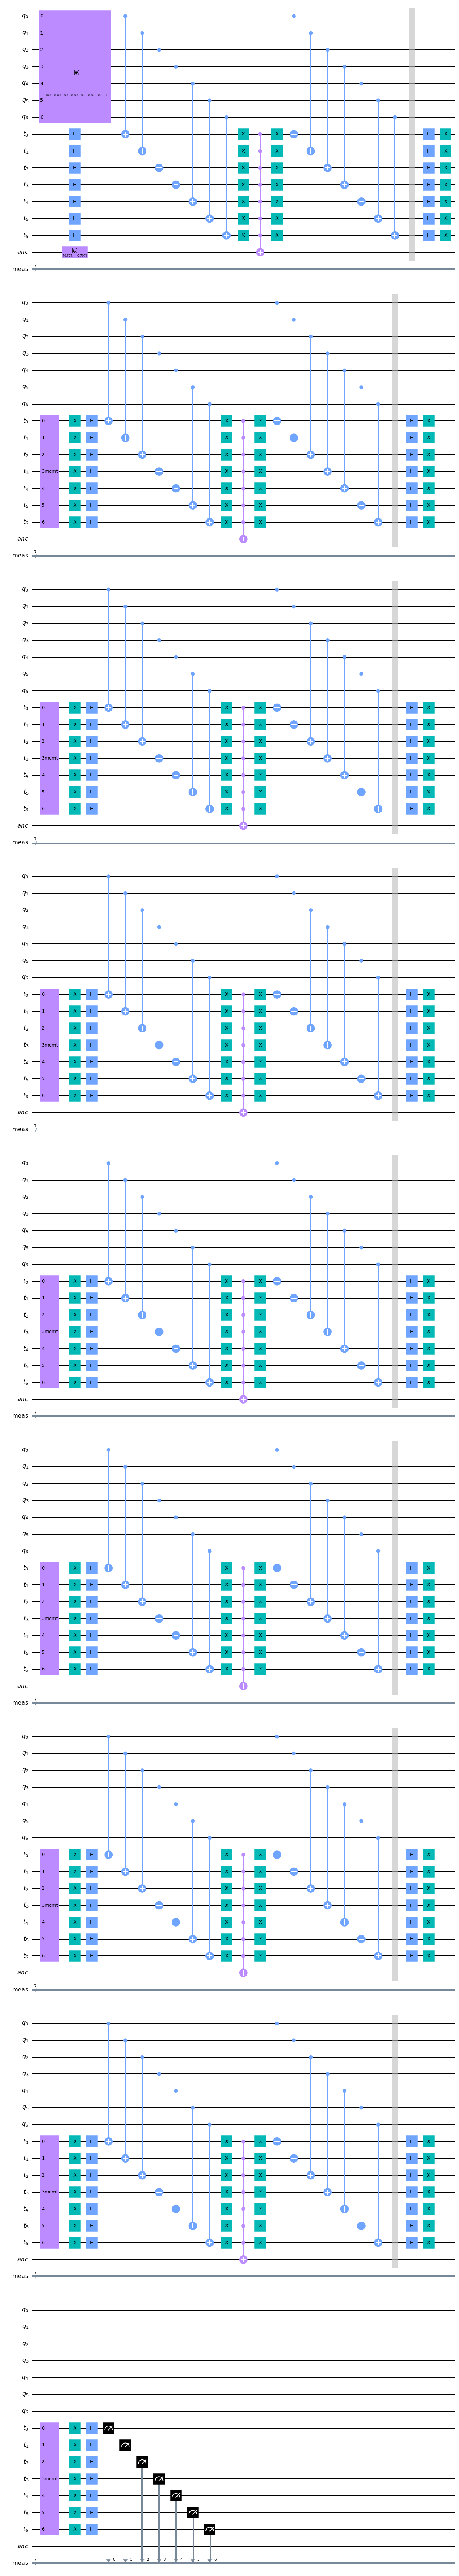

In [7]:
Data = QuantumRegister(n, 'q')
Template = QuantumRegister(n, 't')
Anscilla = QuantumRegister(1,'anc')
Measure = ClassicalRegister(n,'meas')

qc = QuantumCircuit(Data, Template, Anscilla, Measure)

Data_vec = Statevector.from_label('1001010')
# Temp_vec = Statevector.from_label('000000')

qc.initialize(Data_vec,Data)
# qc.initialize(Temp_vec,Template)
# qc.initialize([1,0],Anscilla)
qc.initialize([1/np.sqrt(2), - 1/np.sqrt(2)],Anscilla)      # |-> State that achieves - sign phase kickback.

for i in range(n,2*n):
    qc.h(i)
    
for i in range(8):           #number of time to run Grover
    for i in range(q,n):
        qc.cnot(i,i+n)

    for i in range(q+n,2*n):
        qc.x(i)

    qc.mcx([i for i in range(n+q,2*n)],2*n,mode='noancilla')


    # qc.measure(2*n,Measure)
    # qc.measure_active

    for i in range(q+n,2*n):
        qc.x(i)

    for i in range(q,n):
        qc.cnot(i,i+n)
    qc.barrier()


    qc.h(Template)
    qc.x(Template)
    qc.append(cnz,Template)
    qc.x(Template)
    qc.h(Template)

qc.measure(Template,Measure)

qc.draw(output='mpl')

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-4088 contains invalid instructions {"gates": {mcmt}} for "statevector" method.


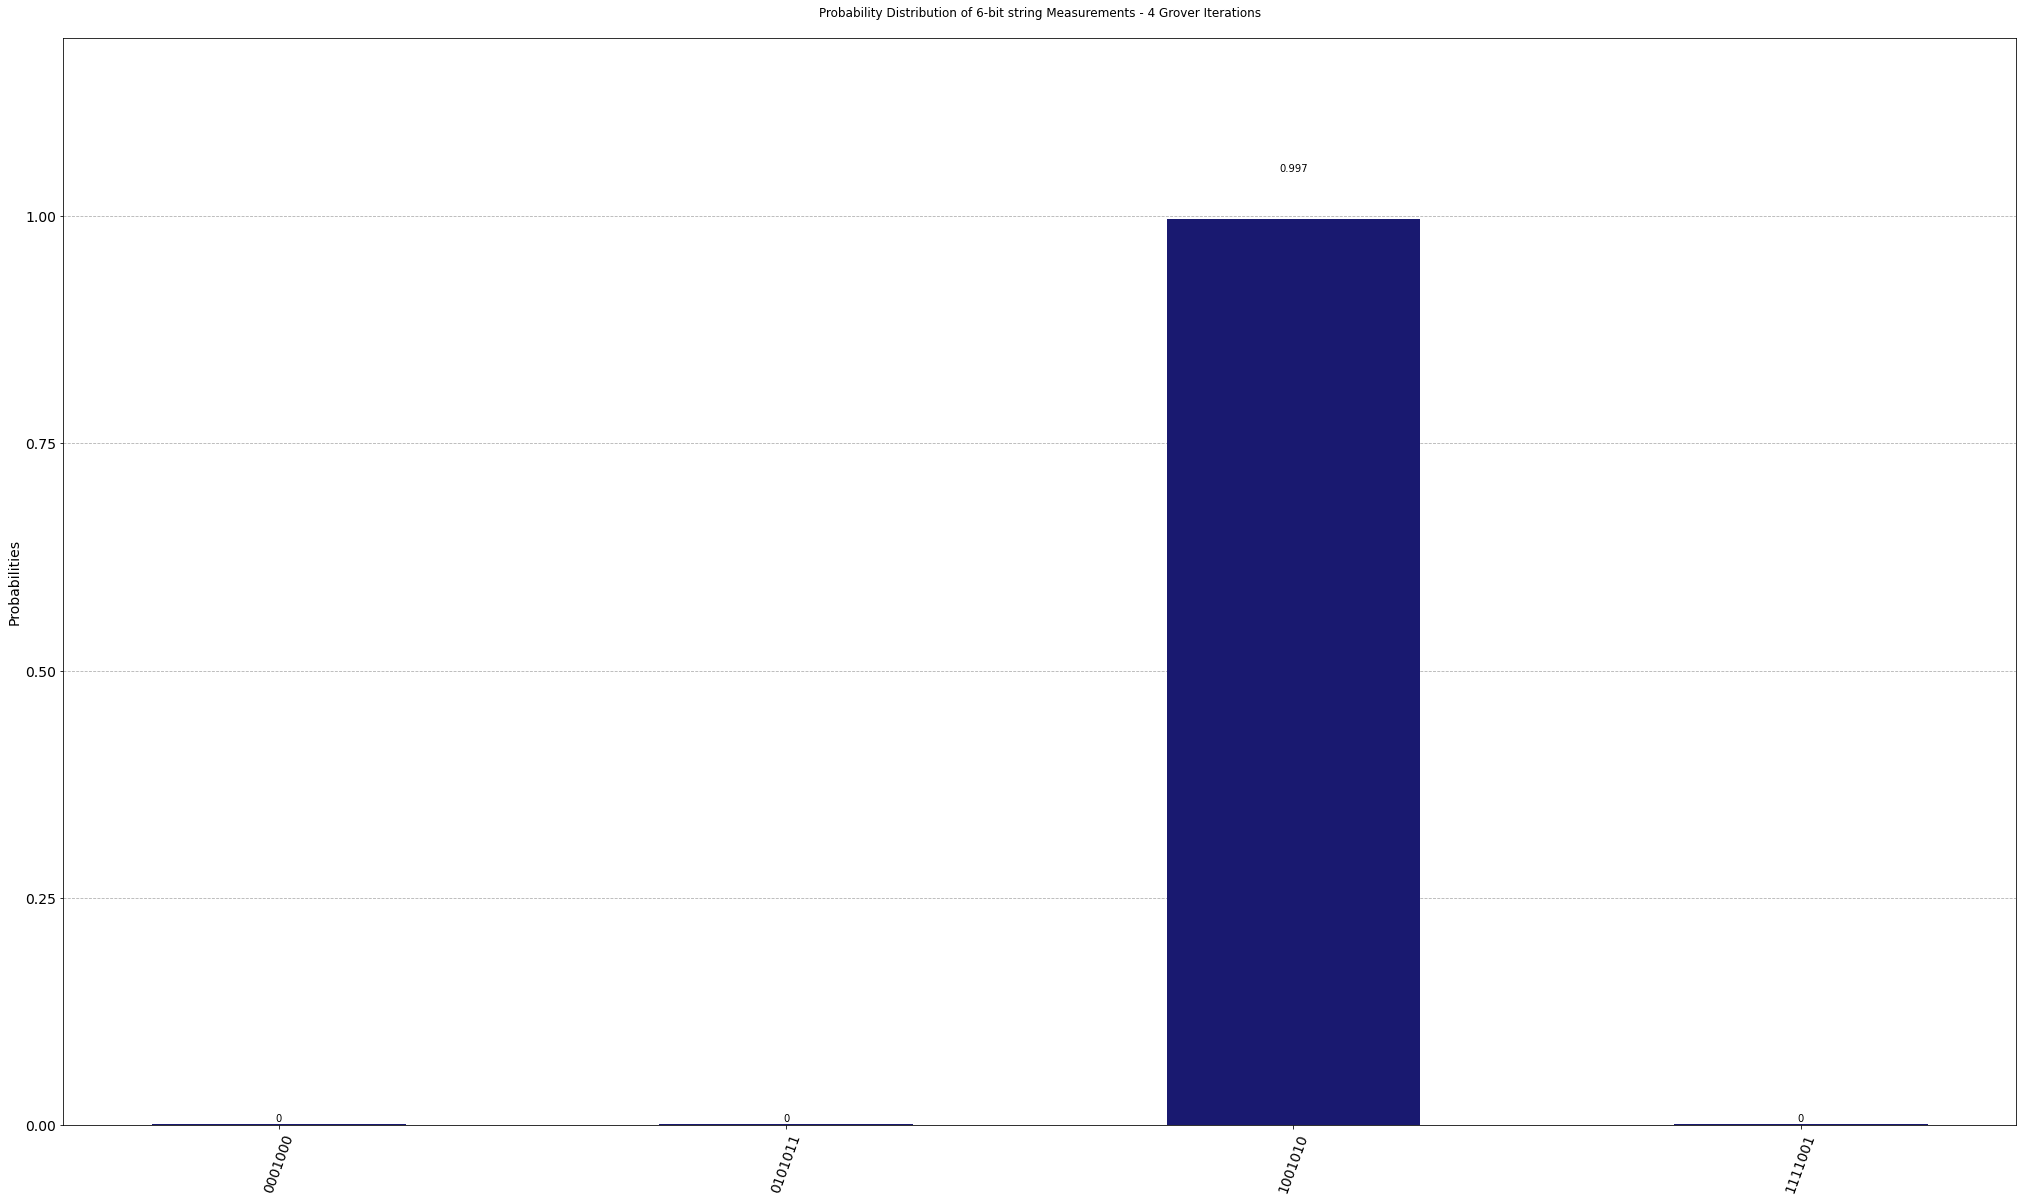

In [8]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = job.result().get_counts(qc)
plot_histogram(counts, title='Probability Distribution of 6-bit string Measurements - 4 Grover Iterations\n', color='midnightblue', figsize=(35,20))

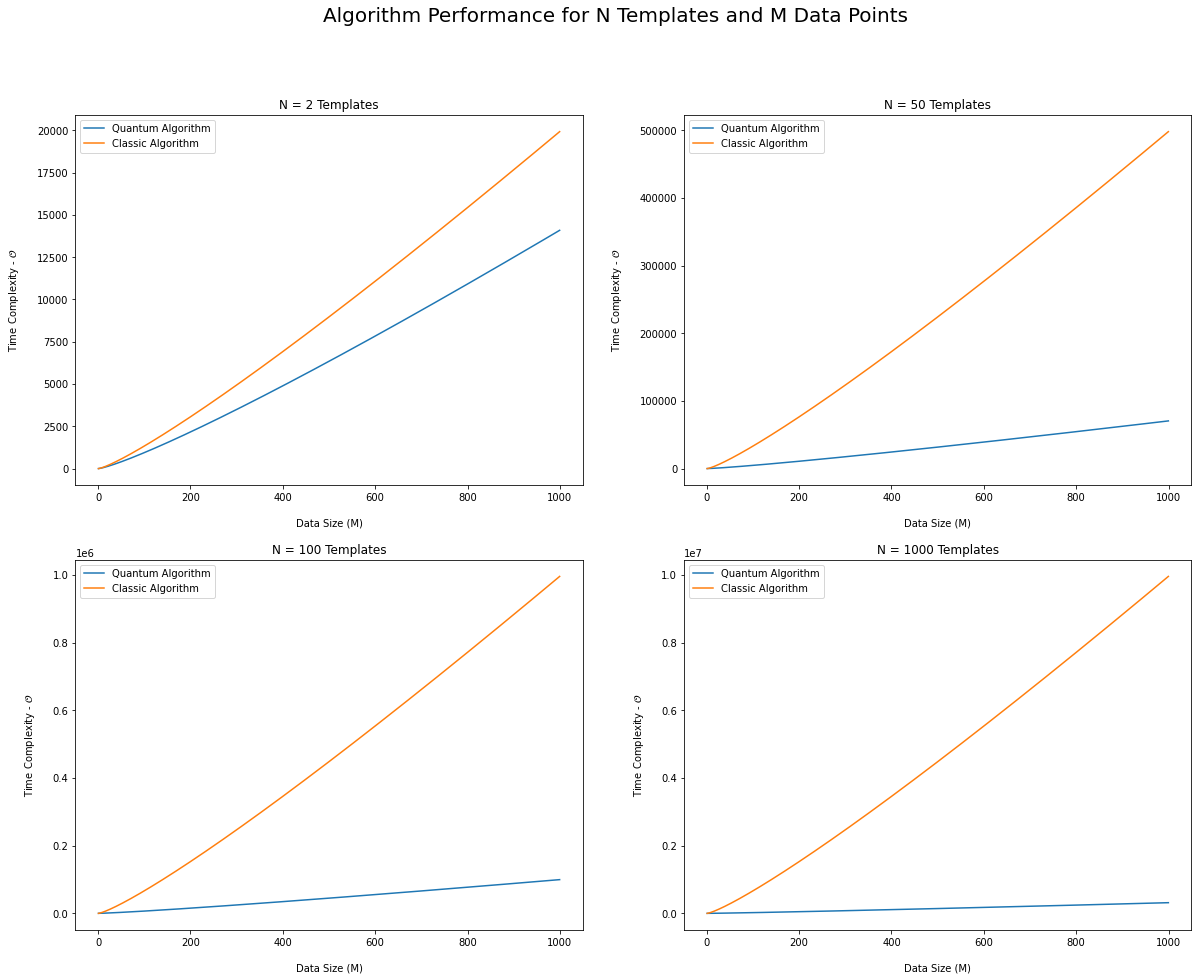

In [171]:
M = np.arange(1,1000,0.5)

# yC = N*M*np.log2(M)
# yQ = (M*np.log2(M) + np.log2(N))*np.sqrt(N)


# plt.ylim(0,6000)

# for i in [250,500,750,1000]:
#     ax.plot(M, (M*np.log2(M) + np.log2(i))*np.sqrt(i))

f = plt.figure(figsize=(20,15))
f.suptitle('Algorithm Performance for N Templates and M Data Points', fontsize=20)
plt.subplot(2, 2, 1)

plt.plot(M,(M*np.log2(M) + np.log2(2))*np.sqrt(2), label= "Quantum Algorithm")
plt.plot(M, 2*M*np.log2(M), label="Classic Algorithm")
plt.title("N = 2 Templates")
plt.ylabel('Time Complexity - $\mathcal{O}$\n',fontsize=10)
plt.xlabel('\nData Size (M)',fontsize=10)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(M,(M*np.log2(M) + np.log2(50))*np.sqrt(50), label= "Quantum Algorithm")
plt.plot(M,50*M*np.log2(M), label="Classic Algorithm")
plt.title("N = 50 Templates")
plt.ylabel('Time Complexity - $\mathcal{O}$\n',fontsize=10)
plt.xlabel('\nData Size (M)',fontsize=10)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(M,(M*np.log2(M) + np.log2(100))*np.sqrt(100), label= "Quantum Algorithm")
plt.plot(M,100*M*np.log2(M), label="Classic Algorithm")
plt.title("N = 100 Templates")
plt.ylabel('Time Complexity - $\mathcal{O}$\n',fontsize=10)
plt.xlabel('\nData Size (M)',fontsize=10)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(M,(M*np.log2(M) + np.log2(1000))*np.sqrt(1000), label= "Quantum Algorithm")
plt.plot(M,1000*M*np.log2(M), label="Classic Algorithm")
plt.title("N = 1000 Templates")
plt.ylabel('Time Complexity - $\mathcal{O}$\n',fontsize=10)
plt.xlabel('\nData Size (M)',fontsize=10)
plt.legend()

plt.show()